In [15]:
import numpy as np
import matplotlib.pyplot as plt
import holoviews as hv
import seaborn as sns
import pickle as pkl
from core import *

In [16]:
background_dir = "./Data/background_yarrays"
virus_dir = "./Data/yarrays"

In [17]:
with open(f"{background_dir}/background_all_y.pkl",'rb') as infile:
    background_yarrays = pkl.load(infile)
with open(f"{virus_dir}/virus_all_y.pkl",'rb') as infile:
    virus_yarrays = pkl.load(infile)

In [18]:
y0 = np.array([[complex(0.5,0.5),complex(1,1)],[complex(0.5,0.5),complex(1,1)]])

all_y = np.zeros((10,20,2,2),dtype="complex128")

for i in range(10):

    def Y(y,t):
        seq = DNA(5)
        alg = Sequence(seq).run()
        y_t = matrix_multiply(y,expm(alg))
        return y_t

    y_array = np.zeros((20,2,2),dtype="complex128")
    y = y0
    for n in range(20):
        y = rkmk_step(Y,y,n)
        y_array[n] = y

    all_y[i-1] = y_array

In [20]:
def matrix_vector_multiply(m,v,vector_type="row"):
    if vector_type == "row":
        return np.array([np.vdot(v,i) for i in m.T])
    elif vector_type == "column":
        return np.array([np.vdot(i,v) for i in m])

def vector_multiply(v1,v2):
    return np.vdot(v1,v2)

In [29]:
def random_complex_vector(n_components=2):
    vals = np.random.rand(n_components,2)
    vector = np.zeros(n_components,dtype="complex128")
    for i in range(n_components):
        vector[i] = complex(vals[i,0],vals[i,1])
    return vector

In [32]:
random_complex_vector()

array([0.7657402+0.96920554j, 0.8625422+0.42618332j])

In [33]:
all_y[0].shape

(20, 2, 2)

In [48]:
v1 = random_complex_vector()
v2 = v1
v1s = []
v2s = []

In [49]:
for i in all_y[0]:
    v1 = matrix_vector_multiply(i,v1)
    v1s.append(v1)
    print(v1)

[-0.0557117 -1.49704608j -0.11142382-2.99409296j]
[-2.32913716+2.16200135j -4.65827519+4.32400316j]
[ -6.73670731+0.25070385j -13.47341783+0.50140787j]
[ -9.72900214-10.48111945j -19.45801325-20.96223923j]
[1.12818056+30.31517197j 2.25634669+60.63037186j]
[47.16503505-43.7804538j 94.33008298-87.5610165j]
[136.41819368 -5.07689123j 272.83659434-10.15366788j]
[197.01186618+212.24269816j 394.02428417+424.48540839j]
[-22.84630145 -613.88178211j -45.69192796-1227.7644552j ]
[ -955.0923317  +886.55287227j -1910.18484274+1773.1080954j ]
[-2762.4671771 +102.80982521j -5524.93908556+205.6167994j ]
[-3989.48353548-4297.91613095j -7978.97966805-8595.8342401j ]
[462.6522029 +12431.09409486j 925.29000997+24862.21581346j]
[19340.62290904-17952.64742401j 38681.25541653-35905.3663748j ]
[ 55939.87622976-2081.99237208j 111879.8869578 -4163.87226509j]
[ 80786.75084222 +87032.81869625j 161573.91302986+174065.63005891j]
[ -9369.22524433-251729.2313889j  -18737.74128927-503459.12866044j]
[-391647.67725072+

In [50]:
for i in all_y[0]:
    v2 = matrix_vector_multiply(i,v2,"column")
    v2s.append(v2)
    print(v2)

[-0.11025518+2.0621873j -0.11025518+2.0621873j]
[2.92789844+3.25866339j 2.92789844+3.25866339j]
[-0.49614739+9.27984267j -0.49614739+9.27984267j]
[13.17554468+14.66398308j 13.17554468+14.66398308j]
[-2.23266314+41.7592836j -2.23266314+41.7592836j]
[59.28993819+65.98789561j 59.28993819+65.98789561j]
[-10.04697563+187.91670663j -10.04697563+187.91670663j]
[266.80464382+296.94543863j 266.80464382+296.94543863j]
[-45.21132669+845.62505345j -45.21132669+845.62505345j]
[1200.62085064+1336.25411209j 1200.62085064+1336.25411209j]
[-203.45094847+3805.31199014j -203.45094847+3805.31199014j]
[5402.79229852+6013.14158941j 5402.79229852+6013.14158941j]
[-915.52912442+17123.89594366j -915.52912442+17123.89594366j]
[24312.55186409+27059.12033552j 24312.55186409+27059.12033552j]
[-4119.88332039+77057.47333601j -4119.88332039+77057.47333601j]
[109406.39588401+121765.95109552j 109406.39588401+121765.95109552j]
[-18539.46339186+346758.37639605j -18539.46339186+346758.37639605j]
[492328.415253+547946.2948

In [52]:
for i in range(20):
    print(np.abs(v1s[i],np.abs(v2s[i])))

[1.49808236 2.99616554]
[3.1779128  6.35582655]
[ 6.74137061 13.48274445]
[14.30060655 28.60121943]
[30.33615735 60.67234207]
[ 64.35268966 128.70546284]
[136.51263089 273.02546435]
[289.58701342 579.17441108]
[ 614.30676042 1228.6143861 ]
[1303.14134207 2606.28441491]
[2764.3796347  5528.76389145]
[ 5864.1335207  11728.27706129]
[12439.70045685 24879.42798293]
[26388.58169816 52777.21909221]
[ 55978.60702839 111957.34427866]
[118748.51848279 237497.31143654]
[251903.52978338 503807.69861143]
[ 534367.76145608 1068737.15519475]
[1133564.53966609 2267133.01936209]
[2404652.70045816 4809313.18606096]


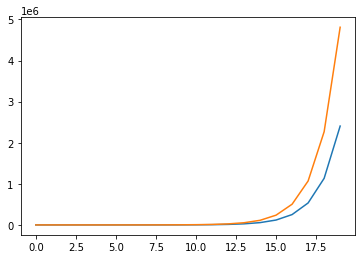

In [64]:
plt.plot(np.arange(0,20),np.abs(v1s))

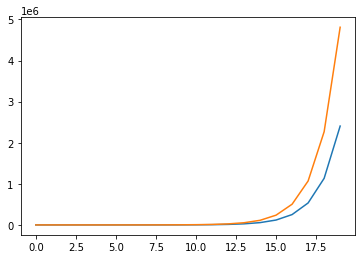

In [65]:
plt.plot(np.arange(0,20),np.abs(v2s))

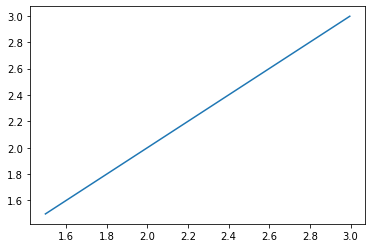

In [67]:
plt.plot(np.abs(v1s)[0,:],np.abs(v2s)[0,:])